# Importing

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy

In [17]:
crimeData = pd.read_csv("join_Output.csv")

In [18]:
countOfCrimes = crimeData.pivot_table(index =["GEOID10", 'Primary_Ty'], aggfunc = 'size')

In [19]:
countOfCrimes.to_excel("CountOfCrimes.xlsx")

In [20]:
df = pd.read_excel("CountOfCrimes.xlsx")

In [21]:
df

,GEOID10,Primary_Ty,0
0,60611.0,CRIMINAL TRESPASS,1
1,NaN,DECEPTIVE PRACTICE,1
2,NaN,THEFT,1
3,60615.0,ARSON,1
4,NaN,ASSAULT,194
...,...,...,...
205,NaN,ROBBERY,20
206,NaN,SEX OFFENSE,2
207,NaN,STALKING,3
208,NaN,THEFT,79


# Cleaning

In [22]:
existing_col_names = list(df.columns)
new_col_names = ["Zipcode", "Primary Type", "Value"]
change_names = dict(zip(existing_col_names, new_col_names))
change_names

{'GEOID10': 'Zipcode', 'Primary_Ty': 'Primary Type', 0: 'Value'}

In [23]:
df.rename(columns=change_names, inplace=True)
df.head()

,Zipcode,Primary Type,Value
0,60611.0,CRIMINAL TRESPASS,1
1,NaN,DECEPTIVE PRACTICE,1
2,NaN,THEFT,1
3,60615.0,ARSON,1
4,NaN,ASSAULT,194


In [24]:
df1 = df.fillna(method='ffill')
df1

,Zipcode,Primary Type,Value
0,60611.0,CRIMINAL TRESPASS,1
1,60611.0,DECEPTIVE PRACTICE,1
2,60611.0,THEFT,1
3,60615.0,ARSON,1
4,60615.0,ASSAULT,194
...,...,...,...
205,60827.0,ROBBERY,20
206,60827.0,SEX OFFENSE,2
207,60827.0,STALKING,3
208,60827.0,THEFT,79


In [25]:
req_values = ["ASSAULT", "BURGLARY", "HOMICIDE", "MOTOR VEHICLE THEFT", "CRIMINAL SEXUAL ASSAULT", "THEFT"]

In [26]:
filtered_df = df1[df1['Primary Type'].isin(req_values)]
filtered_df

,Zipcode,Primary Type,Value
2,60611.0,THEFT,1
4,60615.0,ASSAULT,194
6,60615.0,BURGLARY,65
8,60615.0,CRIMINAL SEXUAL ASSAULT,12
11,60615.0,HOMICIDE,4
16,60615.0,MOTOR VEHICLE THEFT,321
24,60615.0,THEFT,766
27,60617.0,ASSAULT,1002
29,60617.0,BURGLARY,259
32,60617.0,CRIMINAL SEXUAL ASSAULT,34


In [27]:
unique_zipcodes = filtered_df['Zipcode'].unique()
unique_zipcodes

array([60611., 60615., 60617., 60619., 60628., 60633., 60637., 60649.,
       60653., 60827.])

In [28]:
new_rows = pd.DataFrame([])

In [29]:
for i in range(len(unique_zipcodes)):
    vals = set(filtered_df[filtered_df["Zipcode"]==unique_zipcodes[i]]["Primary Type"])
    missing_vals = set(req_values) - vals
    missing_vals = list(missing_vals)
    for j in range(len(missing_vals)):
        new_row = {'Zipcode': unique_zipcodes[i], 'Primary Type': missing_vals[j], 'Value': 0}
        print(new_row)
        new_rows = pd.concat([new_rows, pd.DataFrame([new_row])], ignore_index = True)
        

{'Zipcode': 60611.0, 'Primary Type': 'ASSAULT', 'Value': 0}
{'Zipcode': 60611.0, 'Primary Type': 'CRIMINAL SEXUAL ASSAULT', 'Value': 0}
{'Zipcode': 60611.0, 'Primary Type': 'BURGLARY', 'Value': 0}
{'Zipcode': 60611.0, 'Primary Type': 'MOTOR VEHICLE THEFT', 'Value': 0}
{'Zipcode': 60611.0, 'Primary Type': 'HOMICIDE', 'Value': 0}


In [30]:
df2 = pd.concat([filtered_df, new_rows], ignore_index=True)
df2.loc[df2['Primary Type'] == 'CRIMINAL SEXUAL ASSAULT', 'Primary Type'] = 'SEXUAL ASSAULT'
df2.loc[df2['Primary Type'] == 'MOTOR VEHICLE THEFT', 'Primary Type'] = 'VEHICLE THEFT'
df2

,Zipcode,Primary Type,Value
0,60611.0,THEFT,1
1,60615.0,ASSAULT,194
2,60615.0,BURGLARY,65
3,60615.0,SEXUAL ASSAULT,12
4,60615.0,HOMICIDE,4
5,60615.0,VEHICLE THEFT,321
6,60615.0,THEFT,766
7,60617.0,ASSAULT,1002
8,60617.0,BURGLARY,259
9,60617.0,SEXUAL ASSAULT,34


In [31]:
df3 = df2[df2["Zipcode"] == 46394.0]
df3

,Zipcode,Primary Type,Value


# Plotting

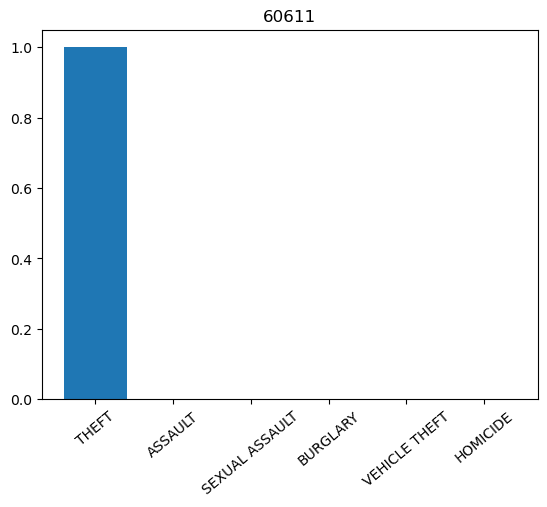

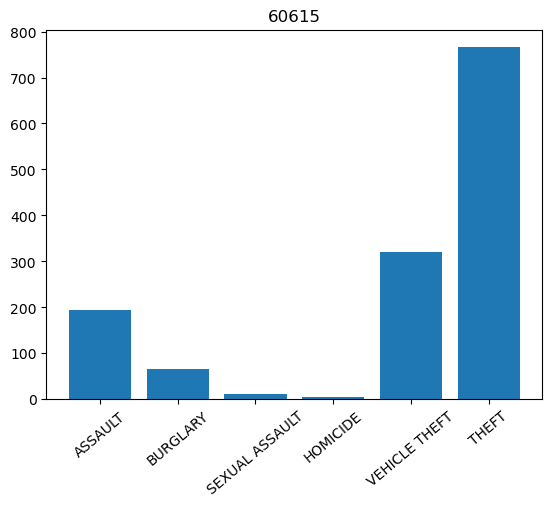

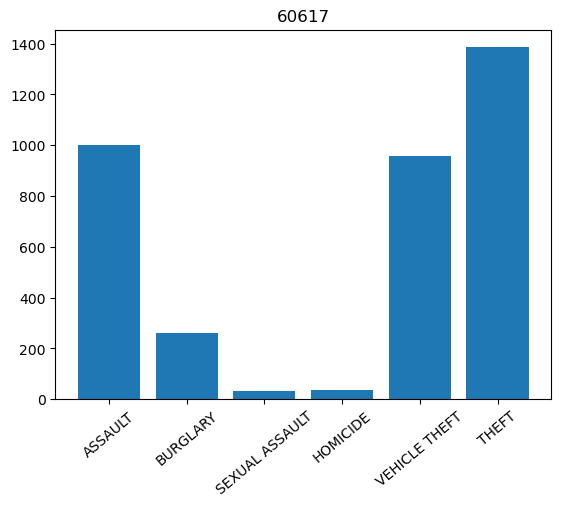

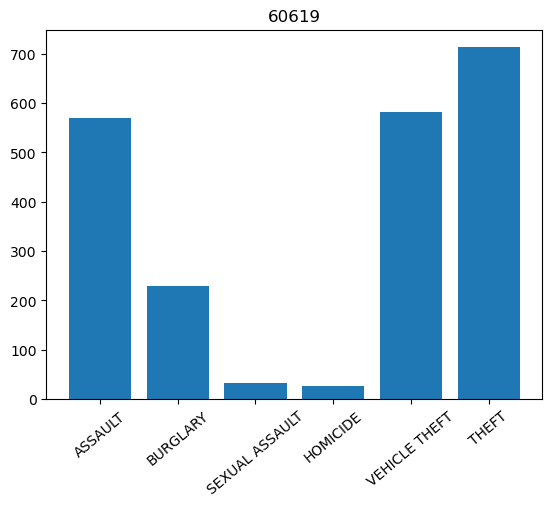

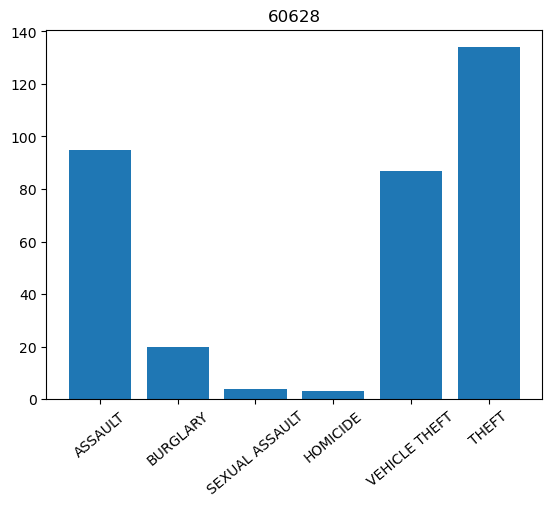

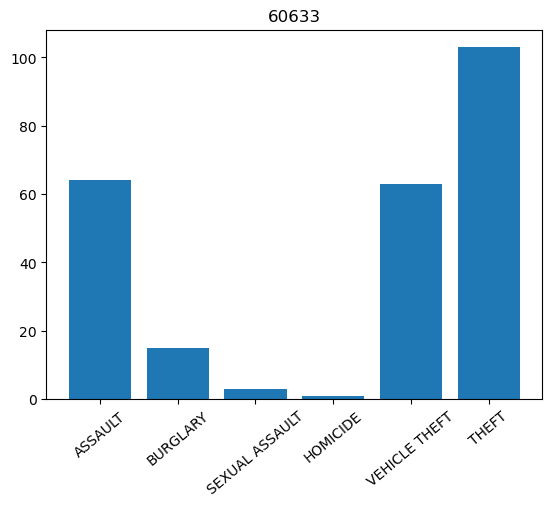

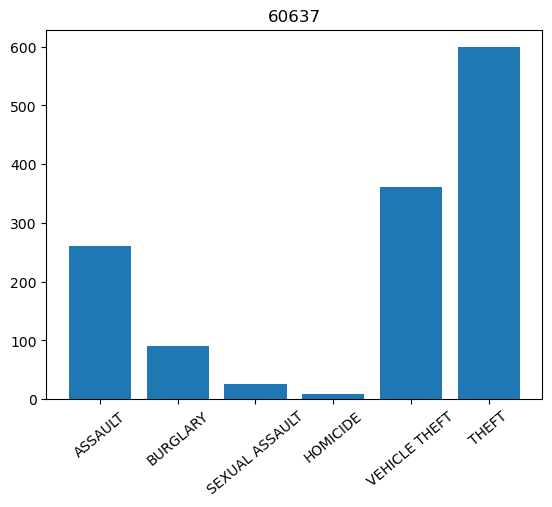

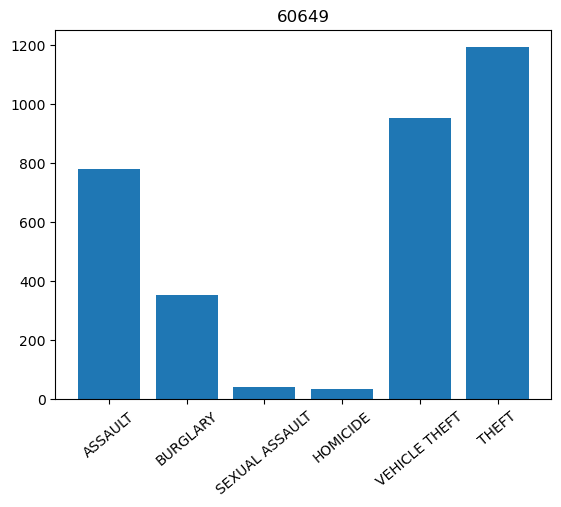

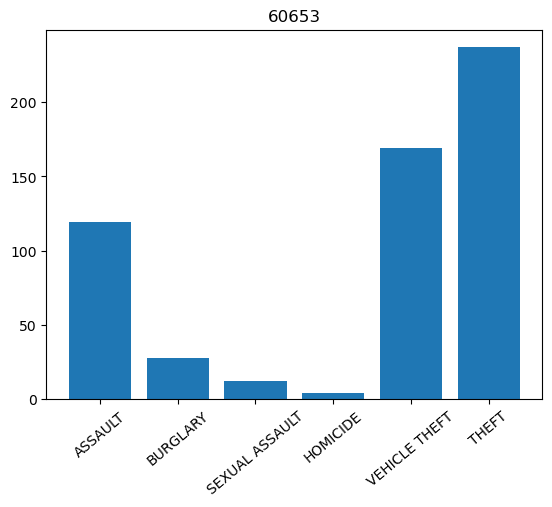

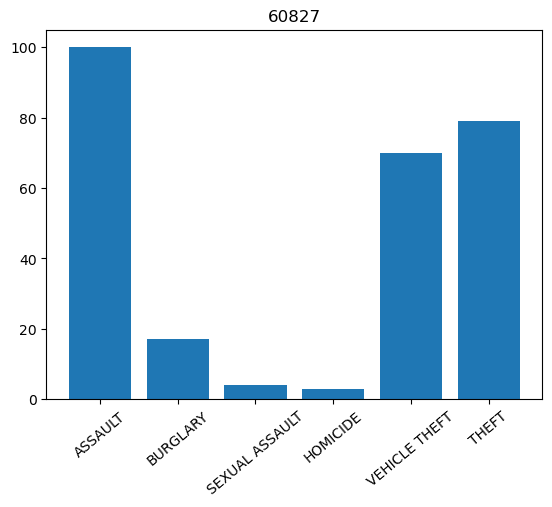

In [32]:
for i in range(len(unique_zipcodes)):
    df4 = df2[df2['Zipcode'] == unique_zipcodes[i]]
    x = list(df4["Primary Type"])
    y = list(df4["Value"])
    plt.bar(x, y)
    plt.xticks(rotation=40)
    plt.title(int(unique_zipcodes[i]))
    plt.show()